# Data Visualization: CORGIS Dataset Project: Food Python
#### Vel (Tien-Yun) Wu
Master of Science in Information Management, University of Illinois at Urbana-Champaign

## Contents

### For the convenience of all sides, I have opted to put all parts in one file. Clicking either of the links below takes the reader to a specific Part.

<a href = "#pt1"> Part 1: Data Exploration (04/12, 2020)</a>
<br>
<a href = "#pt2"> Part 2: Interactive Dashboard (04/19, 2020)</a>
<br>
<a href = "#pt3"> Part 3: Central Viz: Word Cloud (04/23, 2020)</a>

## Data Description

The name of this dataset is simply **"food.data"**, created and maintained by Ryan Whitcomb since 06/21/2016.


Despite its simple-sounding name, it originates from the Food Composition Database owned by Department of Agriculture in the United States of America. Within lies the data of all kinds of food with elaborate Python dictionaries that details the various kinds of nutrients contained by each food type. Vitamins, minerals and macronutrient percentages, to name a few.

For anyone looking to obtain the dataset, its very origin can be found at: https://ndb.nal.usda.gov/
But for myself, I was able to obtain it here: https://think.cs.vt.edu/corgis/python/food/

**Update 04/18/2020:The origin has changed its URL and is now instead accessible at:https://fdc.nal.usda.gov/ **


Supposedly, as it is part of the CORGIS Datasets Project on https://corgis-edu.github.io/corgis/, browsers like ourselves may perform analytics but not changing the original dataset and re-publishing it. The file is 10.5 MB (11,058,835 bytes) in size. A size like this is not insignificant, so one cannot just open it and expect to extract useful information in comprehensible format. Therefore, Python libraries will be required to inspect and analyze it.


In its original form, the dataset has 4 columns:
* `Category`: Denotes food type. Naturally, this is categorical, and so we may utilize this for data grouping later on.
    - Type: String
    - Example: "BUTTER", "MACKEREL", "SCALLOP", etc.
* `Description`: This is a string that is comprised of entirely-uppercase phrases that describe the food. For 
    - Type: String with commas
    - Example: "BUTTER,WITH SALT", "FROG LEGS,RAW", "SCALLOP,(BAY&SEA),CKD,STMD	", etc.
* `Nutrient Data Bank Number`: A integer that conforms to standards put forth by U.S. Department of Agriculture (USDA).
    - Type: Integer
    - Example: "1005", "90240", etc.
* `Data`: The amount of each nutrient type listed as values and keys in a Python dictionary (also JSON format. In this particular case, they may be considered the same)
    - Type: JSON or Python Dictionary equivilant
    - Example: "{'Alpha Carotene': 0, 'Ash': 2.11, 'Beta Carotene' : 0.11, etc...}"


Because the JSON structure in the last column contains more than 40 nutrient types (this number is known after performing the JSON normalization below), the 'Data' column will have to be parsed as multiple columns to be sensible.

In the following sections, brief markdowns will be provided as the writer of this notebook traverses through the dataset programmatically.

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import bqplot
import traitlets
import ipywidgets
import plotly.express as px
import scipy
import scipy.misc
import scipy.cluster
import food
from pandas.io.json import json_normalize

# New imports for Part 3
import nltk
from nltk.corpus import stopwords, words
import string
import itertools
from wordcloud import WordCloud
import operator

# Part 1: Data Exploration <a id = "pt1"> </a>

### First, to import the libraries needed, as exhaustively as possible

### Next, converts the data directly into a pandas Dataframe

Of course, this is after the data is read using the "get_report()" method provided in the documentation

In [2]:
report = food.get_report()

In [3]:
dfObj = pd.DataFrame(report)
dfObj

,Category,Description,Nutrient Data Bank Number,Data
0,BUTTER,"BUTTER,WITH SALT",1001,"{'Alpha Carotene': 0, 'Ash': 2.11, 'Beta Carot..."
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,"{'Alpha Carotene': 0, 'Ash': 2.11, 'Beta Carot..."
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,"{'Alpha Carotene': 0, 'Ash': 0.0, 'Beta Carote..."
3,CHEESE,"CHEESE,BLUE",1004,"{'Alpha Carotene': 0, 'Ash': 5.11, 'Beta Carot..."
4,CHEESE,"CHEESE,BRICK",1005,"{'Alpha Carotene': 0, 'Ash': 3.18, 'Beta Carot..."
...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",80200,"{'Alpha Carotene': 0, 'Ash': 1.4, 'Beta Carote..."
7409,MACKEREL,"MACKEREL,SALTED",83110,"{'Alpha Carotene': 0, 'Ash': 13.4, 'Beta Carot..."
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",90240,"{'Alpha Carotene': 0, 'Ash': 3.06, 'Beta Carot..."
7411,SNAIL,"SNAIL,RAW",90560,"{'Alpha Carotene': 0, 'Ash': 1.3, 'Beta Carote..."


As can be seen, the last column named "Data" is where the essential information is in, but it is not quite readable in its JSON format.

Trying to plot and/or perform any analysis from here would not work. Therefore, it is helpful to first inspect the column as a separate dataframe: 

In [4]:
dfObj2 = json_normalize(dfObj['Data'])
dfObj2

,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Kilocalories,Lutein and Zeaxanthin,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,0,2.11,158,0,0.06,215,19,0.0,717,0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,0,2.11,158,0,0.06,219,19,0.0,717,0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,0,0.00,193,0,0.00,256,22,0.0,876,0,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,0,5.11,74,0,2.34,75,15,0.0,353,0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,0,3.18,76,0,2.79,94,15,0.0,371,0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,0,1.40,0,0,0.00,50,65,0.0,73,0,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,0,13.40,0,0,0.00,95,95,0.0,305,0,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,0,3.06,0,0,0.00,53,81,0.0,112,0,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,0,1.30,0,0,2.00,50,65,0.0,90,0,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


This way, it can be seen that there many potential columns in "Data", each denoting a type of nutrient
Fortunately, Mr.Whitcomb has arranged the data in an orderly fashion and the dimensions between these two dataframes are identical.

On a side note, now that the data within JSON is workable, the original 'Data' can be safely discarded. 'Nutrient Data Bank Number' will also be discarded for now as it has nothing to contribute to the quantitative analysis below.

Therefore, we may merge this normalized column back into the original as follow:

In [5]:
foodData_good_to_go = dfObj.merge(dfObj2, left_index=True, right_index = True)
foodData_good_to_go = foodData_good_to_go.drop(['Data', 'Nutrient Data Bank Number'], axis=1)
foodData_good_to_go

,Category,Description,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",0,2.11,158,0,0.06,215,19,0.0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",0,2.11,158,0,0.06,219,19,0.0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",0,0.00,193,0,0.00,256,22,0.0,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",0,5.11,74,0,2.34,75,15,0.0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",0,3.18,76,0,2.79,94,15,0.0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",0,1.40,0,0,0.00,50,65,0.0,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",0,13.40,0,0,0.00,95,95,0.0,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",0,3.06,0,0,0.00,53,81,0.0,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",0,1.30,0,0,2.00,50,65,0.0,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


### With the dataframe working as an average analyst expects it to, let the visual exploraton commence:

In [6]:
foodData_by_category = foodData_good_to_go.groupby(['Category']).sum().reset_index()
foodData_by_category

,Category,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Kilocalories,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,ABALONE,0,3.34,0,0,17.06,179,65,0.0,294,...,534,892,1.77,12,4,1.42,0.300,3.8,4.00,23.0
1,ABIYUCH,0,0.90,60,0,17.60,0,0,5.3,69,...,304,20,0.31,100,5,0.00,0.000,54.1,0.00,0.0
2,ACEROLA,0,0.20,0,0,7.69,0,0,1.1,32,...,146,7,0.10,767,38,0.00,0.009,1677.6,0.00,0.0
3,ACEROLA JUICE,0,0.20,305,0,4.80,0,0,0.3,23,...,97,3,0.10,509,25,0.00,0.004,1600.0,0.18,1.4
4,ACORN FLOUR,0,1.69,0,0,54.65,0,0,0.0,501,...,712,0,0.64,51,3,0.00,0.688,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,YARDLONG BEAN,0,2.06,0,0,26.70,0,0,0.0,141,...,820,248,1.09,1765,89,0.00,0.072,51.2,0.00,0.0
1179,YARDLONG BNS,0,6.77,0,0,104.09,0,0,18.6,583,...,1787,263,5.66,68,4,0.00,0.561,2.4,0.00,0.0
1180,YAUTIA (TANNIER),0,1.45,5,0,23.63,0,0,1.5,98,...,598,21,0.50,8,0,0.00,0.237,5.2,0.00,0.0
1181,YELLOWTAIL,0,2.49,0,0,0.00,126,0,0.0,333,...,958,89,1.19,199,60,2.55,0.345,5.7,0.00,0.1


In [7]:
print("All columns in the current dataset are:")

for each_column in foodData_by_category.columns: 
    print(each_column)

All columns in the current dataset are:
Category
Alpha Carotene
Ash
Beta Carotene
Beta Cryptoxanthin
Carbohydrate
Cholesterol
Choline
Fiber
Kilocalories
Lutein and Zeaxanthin
Lycopene
Manganese
Niacin
Pantothenic Acid
Protein
Refuse Percentage
Retinol
Riboflavin
Selenium
Sugar Total
Thiamin
Water
Fat.Monosaturated Fat
Fat.Polysaturated Fat
Fat.Saturated Fat
Fat.Total Lipid
Household Weights.1st Household Weight
Household Weights.2nd Household Weight
Major Minerals.Calcium
Major Minerals.Copper
Major Minerals.Iron
Major Minerals.Magnesium
Major Minerals.Phosphorus
Major Minerals.Potassium
Major Minerals.Sodium
Major Minerals.Zinc
Vitamins.Vitamin A - IU
Vitamins.Vitamin A - RAE
Vitamins.Vitamin B12
Vitamins.Vitamin B6
Vitamins.Vitamin C
Vitamins.Vitamin E
Vitamins.Vitamin K


Now that we have total values of nutrients of each food type, we can narrow the scope down to the 7 major nutrients:

* Carbohydrates: Column `'Carbohydrate'`
* Proteins: Column `'Protein'`
* Fats: Column `'Fat.Total Lipid'`
* Vitamins: Column `'Vitamins.Vitamin C'`
* Minerals: Column `'Major Minerals.Calcium'`
* Fibre / Fiber: Column `'Fiber'`
* Water: Column `'Water'`

The decision to represent Vitamins with Vitamin C and Minerals with Calcium is temporary. Better methods will be put in place when they become available in the foreseable future.

# Plot 1: An unsuccessful Line Plot

These are plotted to show the distribution of the 7 selected nutrients across all food types:

Text(0, 0.5, 'Amount of Nutrients')

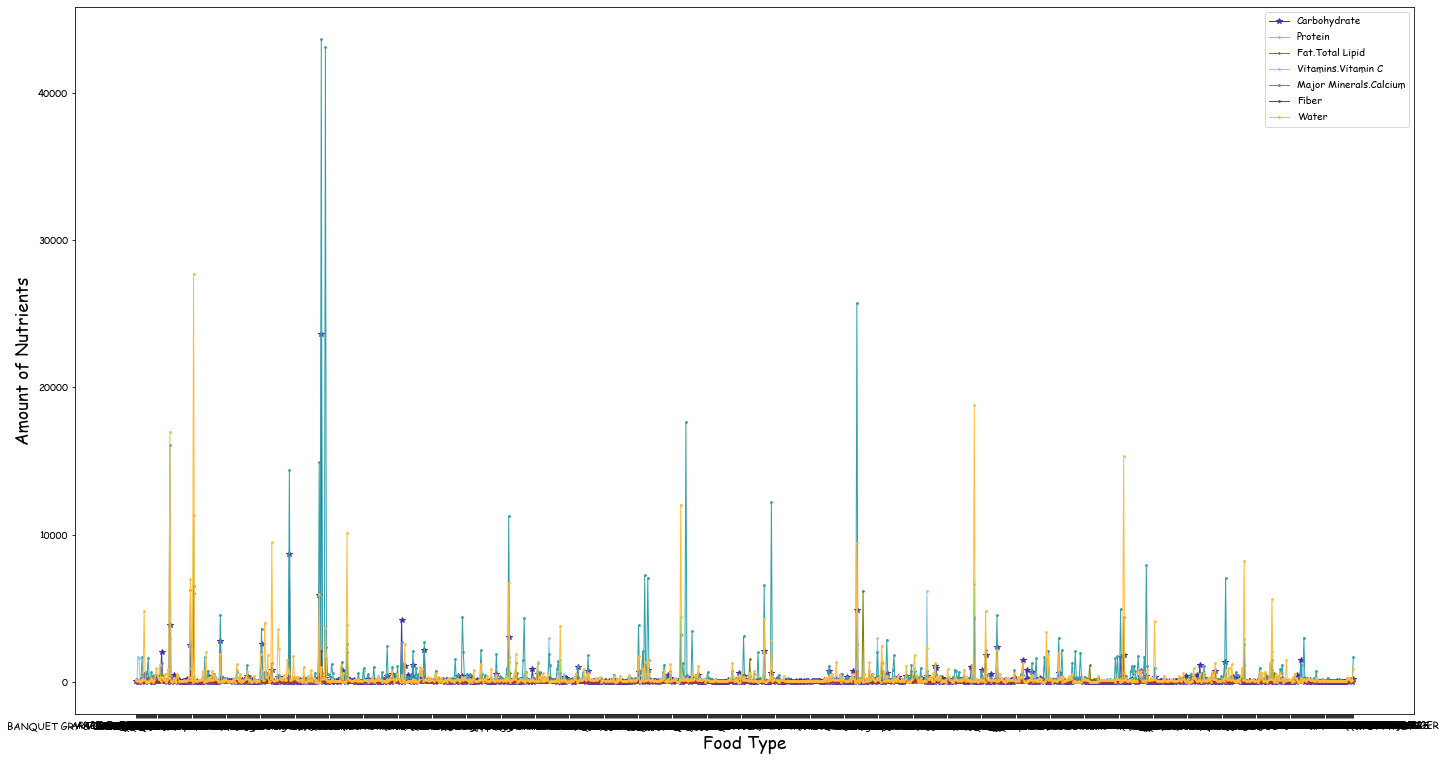

In [8]:
plt.figure(figsize=(24,13))
plt.plot( 'Category', 'Carbohydrate', data=foodData_by_category, marker='*', color='#4832a8', linewidth=1)
plt.plot( 'Category', 'Protein', data=foodData_by_category, marker='*', markersize=2, color='#3dff47', linewidth=1)
plt.plot( 'Category', 'Fat.Total Lipid', data=foodData_by_category, marker='*', markersize=2, color='olive', linewidth=1)
plt.plot( 'Category', 'Vitamins.Vitamin C', data=foodData_by_category, marker='p', markersize=2, color='skyblue', linewidth=1)
plt.plot( 'Category', 'Major Minerals.Calcium', data=foodData_by_category, marker='p', markersize=2, color='#32a2a8', linewidth=1)
plt.plot( 'Category', 'Fiber', data=foodData_by_category, marker='p', markersize=2, color='#a83232', linewidth=1)
plt.plot( 'Category', 'Water', data=foodData_by_category, marker='p', markersize=2, color='#ffbb3d', linewidth=1)

plt.legend()
plt.xlabel('Food Type', fontsize = 'xx-large')
plt.ylabel('Amount of Nutrients', fontsize = 'xx-large')

Suffice to say, this is not exactly helpful because there are a total of 1183 types of food. Though some foods do stand out as having particularly high values of Water, Calcium and Fat Total Lipid.
**As a result, this plot cannot quite be considered successful. Another attempt is necessay.**

# Plot 2: A Successful Histogram

By switching to using Histogram, the distribution of nutrients across food types can be more meaningfully shown:

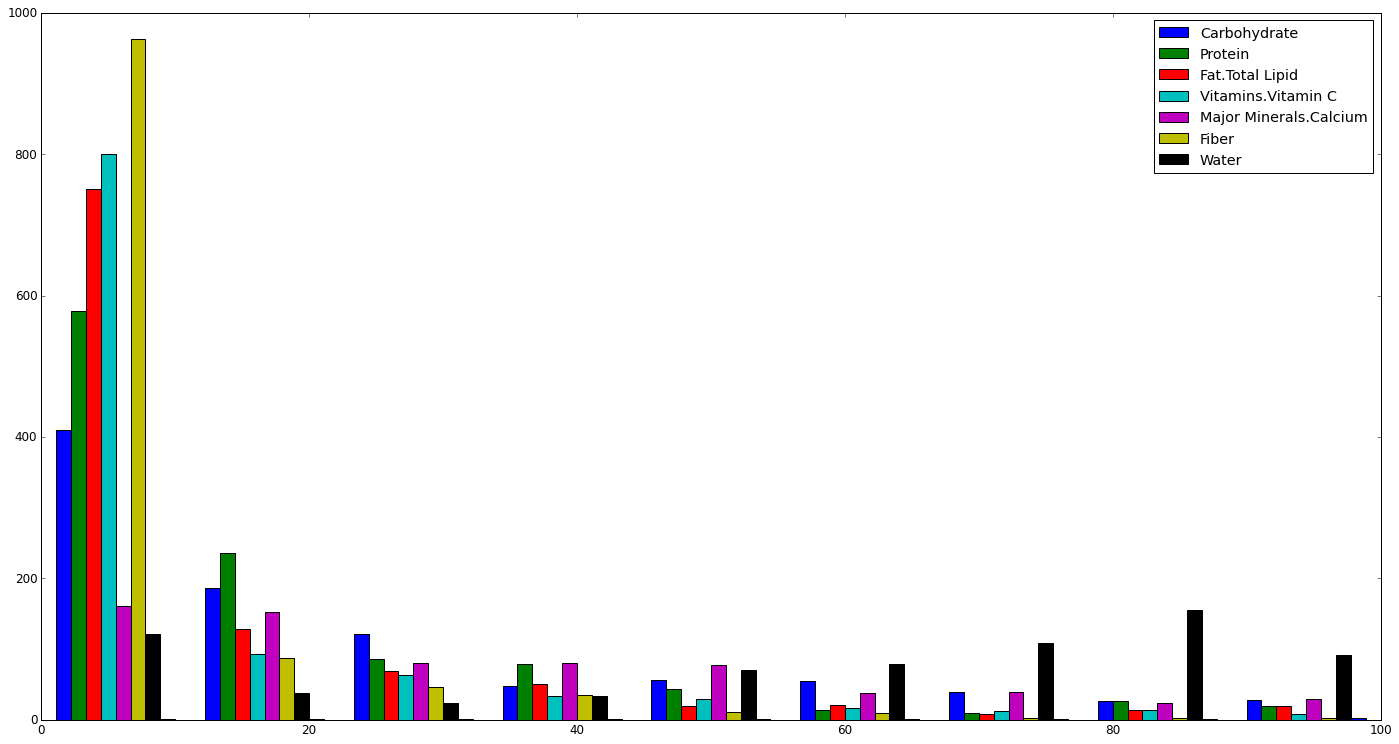

In [9]:
plt.figure(figsize=(24,13))
plt.style.use('classic')

carbon = foodData_by_category['Carbohydrate']
protein = foodData_by_category['Protein']
fatTotalLipid = foodData_by_category['Fat.Total Lipid']
vitaminC = foodData_by_category['Vitamins.Vitamin C']
mineralCalcium = foodData_by_category['Major Minerals.Calcium']
fiber = foodData_by_category['Fiber']
water = foodData_by_category['Water']
bins = np.linspace(0, 100, 10)

plt.hist([carbon, protein, fatTotalLipid, vitaminC, mineralCalcium, fiber, water, bins], bins, 
         label=['Carbohydrate', 
                'Protein', 
                'Fat.Total Lipid', 
                'Vitamins.Vitamin C', 
                'Major Minerals.Calcium', 
                'Fiber',
                'Water'])
plt.legend(loc='upper right')
plt.show()

This is much more insightful. It can now be derived that all food categories (referred to as 'foods' below for simplicity) have varying degrees of distribution in how much of the 7 nutrients they each contain:
* (1) The majority have less than 10 units of each nutrient type, and most do not contain over 20 units of any. 
* (2) There are quite a few foods with notably high ratio of Water (> 80 units).
* (3) Close to 1,000 foods have Fiber but almost none exist beyond 20. That is, most foods contain Fiber but very few of them have much of it.
* (4) The distribution of Calcium is somewhat even. Distribution can be found between 0 and 100 on the X-axis and it are not as skewed to left or right like most other nutrients. That is, foods that contain Calcium do not have as much variance in its ratio as other nutrients.

It is worth noting that this plot does have its limits, as foods which contain over 100 units of any nutrient are ignore by as the boundaries of the X-axis is between 0 and 100, set programmatically. As shown by Plot 1, there are a few of such foods. At this moment, however, they are considered outliers.


This concludes Part 1.

# Part 2: Interactive Dashboard<a id="pt2"></a>

### Because of the instructions' stating to preserve code blocks instead of deleting them, several cells below might appear messy and inconsistent. Regardless, they are all part of the thinking process leading up to the Dashboard's creation.

In [10]:
# Explore how many categories are there

food_category = []
for each in  foodData_good_to_go['Category'].unique():
    food_category.append(each)
food_category.sort()


print(len(food_category))
print(food_category)

# Because there are over 1,000 categories in total, it would be unrealistic to plot on a grid heat map. 
# Another approach is necessary

1183
['ABALONE', 'ABIYUCH', 'ACEROLA', 'ACEROLA JUICE', 'ACORN FLOUR', 'ACORNS', 'AGAVE', 'AGUTUK', 'ALCOHOLIC BEV', 'ALFALFA SEEDS', 'ALLSPICE', 'ALMOND BUTTER', 'ALMONDS', 'AMARANTH', 'AMARANTH GRAIN', 'AMARANTH LEAVES', 'ANCHOVY', 'ANIMAL FAT', 'APPLE CIDER-FLAVORED DRK', 'APPLE JUC', 'APPLES', 'APPLESAUCE', 'APRICOT NECTAR', 'APRICOTS', 'ARCHWAY HOME STYLE COOKIES', 'ARCHWAY Home Style Cookies', 'ARROWHEAD', 'ARROWROOT', 'ARTICHOKES', 'ARTIFICIAL BLUEBERRY MUFFIN MIX', 'ARUGULA', 'ASPARAGUS', 'AVOCADOS', 'BABYFOOD', 'BACON', 'BACON BITS', 'BAGEL', 'BAGELS', 'BAKED BNS', 'BAKING CHOC', 'BALSAM-PEAR (BITTER GOURD)', 'BAMBOO SHOOTS', 'BANANAS', 'BANQUET CHICK POT PIE', 'BANQUET GRY & SALURY STK W/ MSHD POT & CORN IN SEASONSAU', 'BANQUET HEARTY ONE STK DIN', 'BANQUET ORIG FRIED CHK THIGH', 'BANQUET SLCED BF W/GRY', 'BANQUET TKY & GRY W/DRESS ', 'BARBECUE LOAF', 'BARLEY', 'BASIL', 'BASS', 'BEANS', 'BEAR', 'BEECHNUTS', 'BEEF', 'BEEF BROTH&TOMATO JUC', 'BEEF JERKY', 'BEEF POT PIE', 'BEEF 

In [11]:
#all_cat_values_sorted = sorted(list(foodData_good_to_go['Category'].unique())).insert(0,'N/A')
#all_cat_values_sorted
#all_cat_values_sorted

In [12]:
# Making Part 1's successful viz a function so it can be used repeatedly
def show_7_essential_nutriet_dist(fd_subset):
    plt.figure(figsize=(24,13))
    plt.style.use('classic')

    essential_nutrients = ['Carbohydrate', 
                           'Protein', 
                           'Fat.Total Lipid', 
                           'Vitamins.Vitamin C', 
                           'Major Minerals.Calcium', 
                           'Fiber',
                           'Water']
    
    carbon = fd_subset['Carbohydrate']
    protein = fd_subset['Protein']
    fatTotalLipid = fd_subset['Fat.Total Lipid']
    vitaminC = fd_subset['Vitamins.Vitamin C']
    mineralCalcium = fd_subset['Major Minerals.Calcium']
    fiber = fd_subset['Fiber']
    water = fd_subset['Water']
    bins = np.linspace(0, 100, 10)

    plt.hist([carbon, protein, fatTotalLipid, vitaminC, mineralCalcium, fiber, water, bins], bins, 
             label=essential_nutrients)
    plt.legend(loc='upper right')
    plt.show()

In [13]:
# Test the function with the main dataset
# show_7_essential_nutriet_dist(foodData_good_to_go)

## Dashboard: Version 1
Code referenced from class materials and also from: https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

In [14]:
plt.clf()
irrelevant_options = ['Category', 'Description']
textbox = ipywidgets.Dropdown(
    description='Food Type:   ',
    value='APPLES',
    options=sorted(foodData_good_to_go['Category'].unique().tolist())
)
subsetting_or_not = ipywidgets.Checkbox(False, description='Subset by Category')
x_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
y_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
z_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
bin_count_slider = ipywidgets.IntSlider(min= 5,max=100,step=5,value=10, description='Histogram Bins')

@ipywidgets.interact(x = x_axis_options, y= y_axis_options, z = z_options, 
                     bin_count = bin_count_slider, txt = textbox, sst = subsetting_or_not,
                     colormap = plt.colormaps(),sym_log = True)
def plot(x = 'Carbohydrate',y = 'Fiber', z = 'Protein', colormap = 'hsv', bin_count = 10, txt = "APPLES", sst = False):
    
    if sst:
        dataset_selected = foodData_good_to_go.loc[foodData_good_to_go['Category'] == txt]
    else: 
        dataset_selected = foodData_good_to_go
    
    fig, axs = plt.subplots(1,2,figsize=(16, 9))
    left_plot = axs[0].scatter(dataset_selected[x],dataset_selected[y], cmap=colormap, c=dataset_selected[z])
    bins = np.linspace(0, 100, 10)
    right_plot = plt.hist([dataset_selected[x], dataset_selected[y], dataset_selected[z]], bins = bin_count, label=[x, y, z])  
    axs[0].set(xlabel=x, ylabel=y)
    axs[0].title.set_text('Scatter Plot: Compare 3 Nutrients')
    axs[1].title.set_text('Histogram: Compare 3 Nutrients')
    plt.legend(loc='upper right')
    plt.colorbar(left_plot, cax = fig.add_axes([0, 0.1, 0.03, 0.8]) )
    plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='x', index=4, options=('Alpha Carotene', 'Ash', 'Beta Carotene', 'B…

## Dashboard: Version 2
#### The Scatter Plot portion is transformed into a 3D form
#### This is a technique I recently learned from Akhil Sreehari, my mentor in the iSchool Mentorship Program

In [15]:
plt.clf()
irrelevant_options = ['Category', 'Description']
textbox = ipywidgets.Dropdown(
    description='Food Type:   ',
    value='APPLES',
    options=sorted(foodData_good_to_go['Category'].unique().tolist())
)
subsetting_or_not = ipywidgets.Checkbox(False, description='Subset by Category')
x_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
y_axis_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
z_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
zz_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
bin_count_slider = ipywidgets.IntSlider(min= 5,max=100,step=5,value=10, description='Histogram Bins')

@ipywidgets.interact(x = x_axis_options, y= y_axis_options, z = z_options, zz = zz_options,
                     bin_count = bin_count_slider, txt = textbox, sst = subsetting_or_not,
                     colormap = plt.colormaps(),sym_log = True)
def plot(x = 'Carbohydrate',y = 'Fiber', z = 'Protein', zz = 'Water', colormap = 'hsv', bin_count = 10, txt = "APPLES", sst = False):
    
    if sst:
        dataset_selected = foodData_good_to_go.loc[foodData_good_to_go['Category'] == txt]
    else: 
        dataset_selected = foodData_good_to_go
    
    fig = px.scatter_3d(dataset_selected, x=x, y=y, z=z,
              color=zz)
    fig.show()
    fig, axs = plt.subplots(figsize=(16, 9))
    right_plot = plt.hist([dataset_selected[x], dataset_selected[y], dataset_selected[z], dataset_selected[zz]], bins = bin_count, label=[x, y, z, zz])  
    axs.title.set_text('Histogram: Compare 4 Nutrients')
    plt.legend(loc='upper right')
    plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='x', index=4, options=('Alpha Carotene', 'Ash', 'Beta Carotene', 'B…

I wanted to completely ditch version 1 and stick with version 2, but could not find a workaround to get plotly's 3D Scatter Plot to align horizontally with matplotlib's histogram.

# Prose 

### Explanations to non-experts on how to use the Dashboard

The 2 Dashboard are functionally the same, in that user inputs alter both views of the dataset through selections of: (1) Which nutrients to compare, and (2) Whether to subset the data by food category. For both Versions, each food is represented by a node on the Scatterplots, with its location naturally being decided by how much each nutrient(selected by the user) it contains; the Histograms inspect the dataset using a greater scope, showing whole distributions of each nutrient.For version 1, users may use the 'x', 'y' and 'z' dropdown menus to select up to 3 nutrients: the first 2 selections will be plotted on the X and Y axes of the Scatterplot, while the 3rd selection is shown through the nodes' colors; the distributions of the 3 selected nutrients will then be displayed on the right by the Histogram. Version 2 differs slightly in that it allows a 4th nutrient to be chosen ('zz') and plots the first 3 choice on 3D axes while the 4th choice is shown through node colors, and so its Histogram also accomodates 4 distributions. Users may change Version 1 Scatterplot's color theme using 'colormap', and both Versions' Histograms may have their numbers of bins changed through sliders. Finally, 'Food Type' is a dropdown which allows filtering data so the nutrient distributions of a certain kind of food can be inspected: once a type is specified with the 'Subset by Category' checkbox below it toggled on, the dashboard focuses on just the foods in that specific food type.

### List of  contextual datasets identified, links to where they reside, and a sentence about why they might be useful in telling the final story.

In telling the final story about how particular food types possess certain nutrients (more or less) than others, the Central Data (which the CORGIS dataset is built on), 3 datasets have been identified as (potentially) important. Note that the story itself is still in planning and depending on the direction of the actual analysis, all 3 datasets may or may not be utilized in the end: 
(1) Foundation Foods: This set lists out just the essential food types. This will most likely be referenced amongst the 3, as it is most directly addresses whether how certain food types contain more of certain nutrients than others.
(2) Branded Foods: This set is more specific in that it focuses on only foods with brands. It might shed some light on whether certain brands are different from the same types made by other brands.
(3) Supporting Data: The many files contained within can help explaining the others within the previous 2. However, because of the heavy terminology involved, this will likely be of little use. 


All 3 datasets can found and downloaded on: https://fdc.nal.usda.gov/download-datasets.html

# Part 3:  Interactive Data Visualization Article<a id="pt3"></a>

# DELETE THIS AFTER THE WORK IS DONE

For MyBinder:
https://github.com/binder-examples/conda

For WordCloud:
http://localhost:8888/notebooks/inClass_week09_part1.ipynb

Other Dataset: Supporting Data April 2020 from:
https://fdc.nal.usda.gov/download-datasets.html

### 3.1 Central visualization (static, no interactivity)

##### This backbone of this visualization is mostly based on 'inClass_week09_part1.ipynb' supplied by: https://uiuc-ischool-dataviz.github.io/spring2020/week09/

In [16]:
foodData_good_to_go

,Category,Description,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",0,2.11,158,0,0.06,215,19,0.0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",0,2.11,158,0,0.06,219,19,0.0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",0,0.00,193,0,0.00,256,22,0.0,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",0,5.11,74,0,2.34,75,15,0.0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",0,3.18,76,0,2.79,94,15,0.0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",0,1.40,0,0,0.00,50,65,0.0,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",0,13.40,0,0,0.00,95,95,0.0,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",0,3.06,0,0,0.00,53,81,0.0,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",0,1.30,0,0,2.00,50,65,0.0,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


In [17]:
## The idea of creating a new column for word cloud was tested for a bit, but eventually deemed unnecessary
#foodData_good_to_go["Description_Parsed"] = foodData_good_to_go["Description"].str.replace(","," ")
#foodData_good_to_go

In [18]:
word_cloud_origin = foodData_good_to_go["Description"].str.replace(","," ").str.cat().split()
word_cloud_origin

['BUTTER',
 'WITH',
 'SALTBUTTER',
 'WHIPPED',
 'WITH',
 'SALTBUTTER',
 'OIL',
 'ANHYDROUSCHEESE',
 'BLUECHEESE',
 'BRICKCHEESE',
 'BRIECHEESE',
 'CAMEMBERTCHEESE',
 'CARAWAYCHEESE',
 'CHEDDARCHEESE',
 'CHESHIRECHEESE',
 'COLBYCHEESE',
 'COTTAGE',
 'CRMD',
 'LRG',
 'OR',
 'SML',
 'CURDCHEESE',
 'COTTAGE',
 'CRMD',
 'W/FRUITCHEESE',
 'COTTAGE',
 'NONFAT',
 'UNCRMD',
 'DRY',
 'LRG',
 'OR',
 'SML',
 'CURDCHEESE',
 'COTTAGE',
 'LOWFAT',
 '2%',
 'MILKFATCHEESE',
 'COTTAGE',
 'LOWFAT',
 '1%',
 'MILKFATCHEESE',
 'CREAMCHEESE',
 'EDAMCHEESE',
 'FETACHEESE',
 'FONTINACHEESE',
 'GJETOSTCHEESE',
 'GOUDACHEESE',
 'GRUYERECHEESE',
 'LIMBURGERCHEESE',
 'MONTEREYCHEESE',
 'MOZZARELLA',
 'WHL',
 'MILKCHEESE',
 'MOZZARELLA',
 'WHL',
 'MILK',
 'LO',
 'MOISTCHEESE',
 'MOZZARELLA',
 'PART',
 'SKIM',
 'MILKCHEESE',
 'MOZZARELLA',
 'PART',
 'SKIM',
 'MILK',
 'LO',
 'MOISTCHEESE',
 'MUENSTERCHEESE',
 'NEUFCHATELCHEESE',
 'PARMESAN',
 'GRATEDCHEESE',
 'PARMESAN',
 'HARDCHEESE',
 'PORT',
 'DE',
 'SALUTCHEESE',

In [19]:
word_cloud_base = {}
for each_word in word_cloud_origin:
    if each_word in word_cloud_base: 
        word_cloud_base[each_word] += 1 
    else:
        word_cloud_base[each_word] = 1
word_cloud_base = sorted(word_cloud_base.items(), key=operator.itemgetter(1))
word_cloud_base = dict(word_cloud_base[::-1])
word_cloud_base

{'CKD': 1340,
 'W/': 615,
 'LN': 566,
 '&': 560,
 'FAT': 467,
 'CND': 462,
 'MEAT': 381,
 'LN&FAT': 380,
 'FRZ': 364,
 'BLD': 347,
 'PREP': 320,
 'DRND': 304,
 'RTE': 298,
 'DRY': 288,
 'OR': 260,
 'FRSH': 248,
 'RND': 238,
 'SOUP': 232,
 'LOIN': 227,
 'ALL': 224,
 'CHICK': 224,
 '1/8"FAT': 221,
 'CHOIC': 221,
 'RED': 212,
 'WHITE': 211,
 'SEEDS': 183,
 'WHL': 178,
 'MIX': 171,
 'SEL': 160,
 'CHOC': 158,
 'VEG': 158,
 'BF': 140,
 'OF': 140,
 'MATURE': 139,
 'FOODS': 137,
 'RAWBEEF': 136,
 'REG': 134,
 'ONLY': 133,
 'GRDS': 130,
 'HAM': 128,
 'QUAKER': 127,
 '0"': 126,
 'CURED': 125,
 'BRLDBEEF': 124,
 'MEAT&SKN': 122,
 'SHLDR': 119,
 'JUC': 117,
 'TOP': 116,
 'COMPANY': 113,
 'FRYERS': 112,
 'BROILERS': 112,
 'RIB': 109,
 'INST': 108,
 'H2O': 104,
 'VAR': 102,
 '(ALASKA': 99,
 'FROM': 99,
 'LT': 98,
 'LEG': 96,
 'BEV': 96,
 'RAW': 95,
 'CRM': 94,
 'DOM': 93,
 'DRSNG': 93,
 'BNLESS': 92,
 'LO': 91,
 'FRUIT': 89,
 'IMP': 88,
 'MEATS&BY-PRODUCTS': 88,
 'RAWLAMB': 86,
 'BONE-IN': 86,
 '0"F

In [20]:
# Planning to visualize the 30 most frequent words in the dataset
n = 30
word_cloud_plot = {k: word_cloud_base[k] for k in list(word_cloud_base)[:n]} 
word_cloud_plot

{'CKD': 1340,
 'W/': 615,
 'LN': 566,
 '&': 560,
 'FAT': 467,
 'CND': 462,
 'MEAT': 381,
 'LN&FAT': 380,
 'FRZ': 364,
 'BLD': 347,
 'PREP': 320,
 'DRND': 304,
 'RTE': 298,
 'DRY': 288,
 'OR': 260,
 'FRSH': 248,
 'RND': 238,
 'SOUP': 232,
 'LOIN': 227,
 'ALL': 224,
 'CHICK': 224,
 '1/8"FAT': 221,
 'CHOIC': 221,
 'RED': 212,
 'WHITE': 211,
 'SEEDS': 183,
 'WHL': 178,
 'MIX': 171,
 'SEL': 160,
 'CHOC': 158}

In [21]:
# Though unlikely to happen, it is safest to get rid of stop words to keep the data clean
stop_words = set(stopwords.words('english'))
word_cloud_base_less_words = {}
for w, num in word_cloud_base.items():
    if w.lower() not in stop_words:
        word_cloud_base_less_words[w] = num
word_cloud_base_less_words

{'CKD': 1340,
 'W/': 615,
 'LN': 566,
 '&': 560,
 'FAT': 467,
 'CND': 462,
 'MEAT': 381,
 'LN&FAT': 380,
 'FRZ': 364,
 'BLD': 347,
 'PREP': 320,
 'DRND': 304,
 'RTE': 298,
 'DRY': 288,
 'FRSH': 248,
 'RND': 238,
 'SOUP': 232,
 'LOIN': 227,
 'CHICK': 224,
 '1/8"FAT': 221,
 'CHOIC': 221,
 'RED': 212,
 'WHITE': 211,
 'SEEDS': 183,
 'WHL': 178,
 'MIX': 171,
 'SEL': 160,
 'CHOC': 158,
 'VEG': 158,
 'BF': 140,
 'MATURE': 139,
 'FOODS': 137,
 'RAWBEEF': 136,
 'REG': 134,
 'GRDS': 130,
 'HAM': 128,
 'QUAKER': 127,
 '0"': 126,
 'CURED': 125,
 'BRLDBEEF': 124,
 'MEAT&SKN': 122,
 'SHLDR': 119,
 'JUC': 117,
 'TOP': 116,
 'COMPANY': 113,
 'FRYERS': 112,
 'BROILERS': 112,
 'RIB': 109,
 'INST': 108,
 'H2O': 104,
 'VAR': 102,
 '(ALASKA': 99,
 'LT': 98,
 'LEG': 96,
 'BEV': 96,
 'RAW': 95,
 'CRM': 94,
 'DOM': 93,
 'DRSNG': 93,
 'BNLESS': 92,
 'LO': 91,
 'FRUIT': 89,
 'IMP': 88,
 'MEATS&BY-PRODUCTS': 88,
 'RAWLAMB': 86,
 'BONE-IN': 86,
 '0"FAT': 83,
 'PDR': 83,
 'ADDED': 81,
 'CHS': 81,
 'WO/': 81,
 'PK'

In [22]:
# Removing punctuation words might also help (again, given the nature of this dataset such is unlikely)
word_cloud_base_no_punc_words = {}
for word, value in word_cloud_base_less_words.items():
    if word[-1] in string.punctuation: 
        word = word[:-1] 
    if len(word) > 0: 
        if word in word_cloud_base_no_punc_words: 
            word_cloud_base_no_punc_words[word] += value 
        else: 
            word_cloud_base_no_punc_words[word] = value
word_cloud_base_no_punc_sorted = sorted(word_cloud_base_no_punc_words.items(), key=operator.itemgetter(1)) 
word_cloud_base_no_punc_sorted = dict(word_cloud_base_no_punc_sorted[::-1])
word_cloud_base_no_punc_sorted

{'CKD': 1340,
 'W': 615,
 'LN': 566,
 'FAT': 475,
 'CND': 462,
 'MEAT': 381,
 'LN&FAT': 380,
 'FRZ': 364,
 'BLD': 347,
 'PREP': 320,
 'DRND': 304,
 'RTE': 298,
 'DRY': 288,
 'RND': 248,
 'FRSH': 248,
 'SOUP': 232,
 'LOIN': 227,
 'CHICK': 224,
 'CHOIC': 221,
 '1/8"FAT': 221,
 'RED': 212,
 'WHITE': 211,
 'SEEDS': 183,
 'WHL': 178,
 'MIX': 171,
 'SEL': 160,
 'VEG': 158,
 'CHOC': 158,
 'BF': 140,
 'MATURE': 139,
 'FOODS': 137,
 'RAWBEEF': 136,
 'REG': 134,
 'GRDS': 130,
 'HAM': 128,
 'QUAKER': 127,
 '0': 126,
 'CURED': 125,
 'BRLDBEEF': 124,
 'MEAT&SKN': 122,
 'SHLDR': 120,
 'JUC': 117,
 'TOP': 116,
 'COMPANY': 113,
 'BROILERS': 112,
 'FRYERS': 112,
 'RIB': 109,
 'INST': 108,
 'H2O': 104,
 'VAR': 102,
 '(ALASKA': 99,
 'LT': 98,
 'BEV': 96,
 'LEG': 96,
 'RAW': 95,
 'CRM': 94,
 'DRSNG': 93,
 'DOM': 93,
 'BNLESS': 92,
 'LO': 91,
 'FRUIT': 89,
 'MEATS&BY-PRODUCTS': 88,
 'IMP': 88,
 'BONE-IN': 86,
 'RAWLAMB': 86,
 'PDR': 83,
 '0"FAT': 83,
 'WO': 82,
 'PK': 81,
 'CHS': 81,
 'ADDED': 81,
 'SKN': 

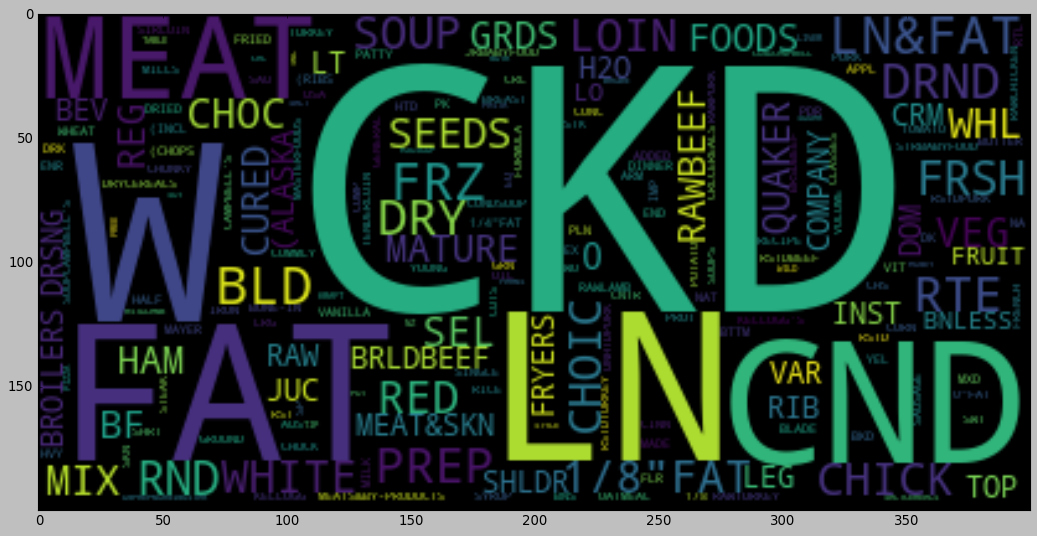

In [23]:
word_cloud_main = WordCloud().generate_from_frequencies(word_cloud_base_no_punc_sorted)
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(word_cloud_main)
plt.show()

In [24]:
# Testing a subsetting action
foodData_good_to_go_subset_for_word_cloud = foodData_good_to_go[foodData_good_to_go['Major Minerals.Sodium'] > 500]
foodData_good_to_go_subset_for_word_cloud

,Category,Description,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Major Minerals.Potassium,Major Minerals.Sodium,Major Minerals.Zinc,Vitamins.Vitamin A - IU,Vitamins.Vitamin A - RAE,Vitamins.Vitamin B12,Vitamins.Vitamin B6,Vitamins.Vitamin C,Vitamins.Vitamin E,Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",0,2.11,158,0,0.06,215,19,0.0,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",0,2.11,158,0,0.06,219,19,0.0,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
3,CHEESE,"CHEESE,BLUE",0,5.11,74,0,2.34,75,15,0.0,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",0,3.18,76,0,2.79,94,15,0.0,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
5,CHEESE,"CHEESE,BRIE",0,2.70,9,0,0.45,100,15,0.0,...,152,629,2.38,592,174,1.65,0.235,0.0,0.24,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,PUDDINGS,"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX",0,5.70,0,0,74.42,0,3,10.1,...,570,3326,1.49,0,0,0.00,0.027,0.0,0.02,0.5
7404,PUDDINGS,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,REG,DRY MIX",0,1.86,0,0,86.04,0,0,0.9,...,18,1765,0.19,0,0,0.00,0.000,0.0,0.05,1.1
7405,PUDDINGS,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY...",0,6.80,0,0,84.66,0,1,0.8,...,30,4250,0.10,0,0,0.05,0.005,0.0,0.08,1.7
7406,FRUIT-FLAVORED DRK MIX,"FRUIT-FLAVORED DRK MIX,PDR,UNSWTND",0,7.74,0,0,91.30,0,0,0.0,...,1,2727,0.01,0,0,0.00,0.000,1090.9,0.00,0.0


In [25]:
def draw_word_cloud_from_food_data(food_data_passed_in, use_filter, column_to_filter, min_value):
    # Input 1 - food_data_passed_in [dataframe]: This is the dataset from which the word cloud will be created. It should follow the format of Ryan Whitcomb's
    # Input 2 - use_filter [boolean]: Whether subsetting options like column or min_value will be used at all
    # Input 3 - column_to_filter [string]: The column to subset food_data_passed_in with.
    # Input 4 - min_value [integer]: The minimum value to subset food_data_passed_in. Any row with specified column value beneath this will be dropped. 
    if use_filter == False: 
        food_data_to_plot = food_data_passed_in
    else:
        food_data_to_plot = food_data_passed_in[food_data_passed_in[column_to_filter] > min_value]
    word_cloud_origin = food_data_to_plot["Description"].str.replace(","," ").str.cat().split()
    word_cloud_base = {}
    for each_word in word_cloud_origin:
        if each_word in word_cloud_base: 
            word_cloud_base[each_word] += 1 
        else:
            word_cloud_base[each_word] = 1
    word_cloud_base = sorted(word_cloud_base.items(), key=operator.itemgetter(1))
    word_cloud_base = dict(word_cloud_base[::-1])
    stop_words = set(stopwords.words('english'))
    word_cloud_base_less_words = {}
    for w, num in word_cloud_base.items():
        if w.lower() not in stop_words:
            word_cloud_base_less_words[w] = num
    word_cloud_base_no_punc_words = {}
    for word, value in word_cloud_base_less_words.items():
        if word[-1] in string.punctuation: 
            word = word[:-1] 
        if len(word) > 0: 
            if word in word_cloud_base_no_punc_words: 
                word_cloud_base_no_punc_words[word] += value 
            else: 
                word_cloud_base_no_punc_words[word] = value
    word_cloud_base_no_punc_sorted = sorted(word_cloud_base_no_punc_words.items(), key=operator.itemgetter(1)) 
    word_cloud_base_no_punc_sorted = dict(word_cloud_base_no_punc_sorted[::-1])
    word_cloud_main = WordCloud().generate_from_frequencies(word_cloud_base_no_punc_sorted)
    fig, ax = plt.subplots(figsize=(16,9))
    ax.imshow(word_cloud_main)
    plt.show()

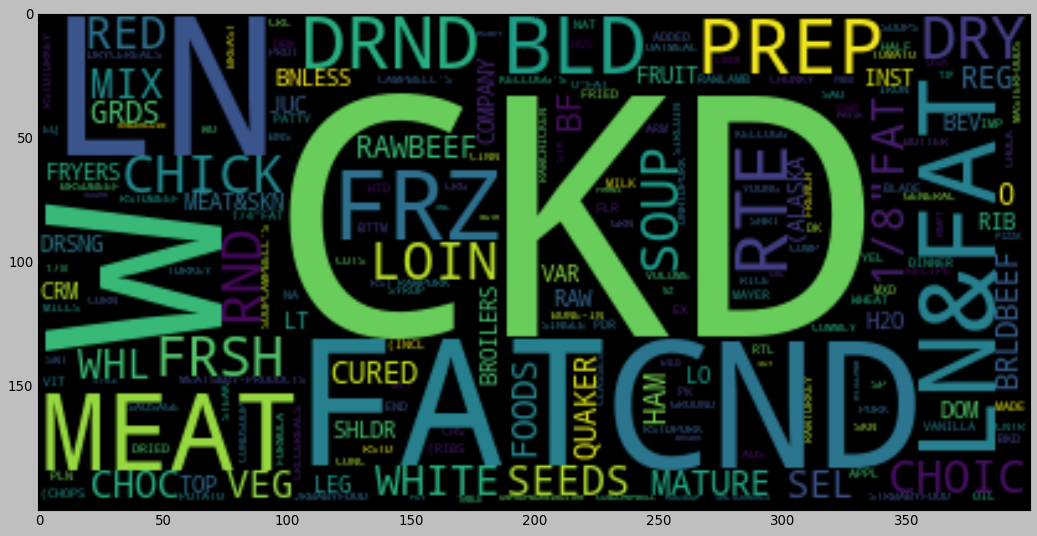

In [26]:
# Test 1 for the function: This should have an identical ouput with 3.1 because nothing has been filtered
draw_word_cloud_from_food_data(foodData_good_to_go, False, 'A False Column', 69)

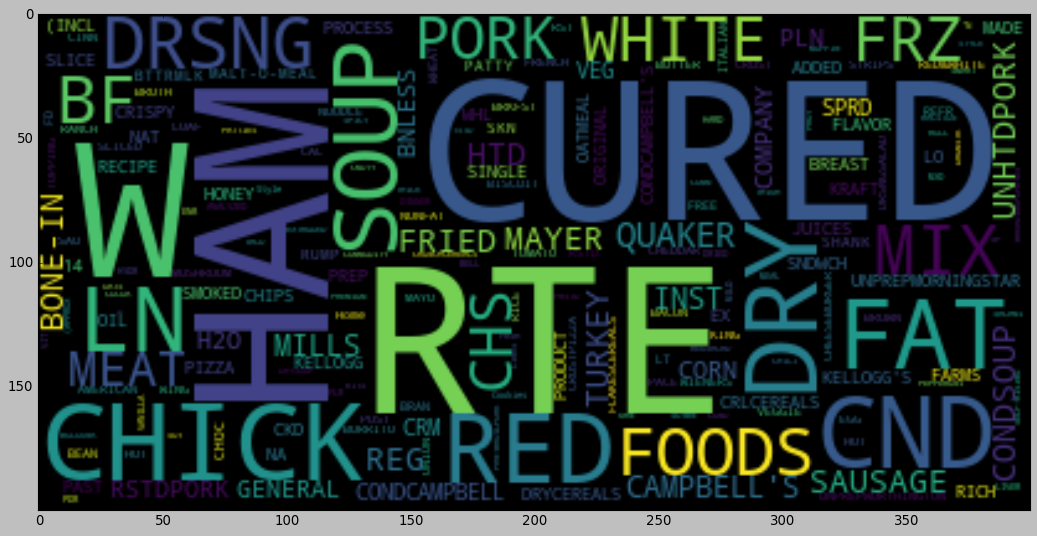

In [27]:
# Test 2 for the function: This should be quite different from 3.1 as the dataset gets subsetted such that only foods with high Sodium value remain
draw_word_cloud_from_food_data(foodData_good_to_go, True, 'Major Minerals.Sodium', 500)

Note to self: The filter appears successful as words that indicate salty food types emerge in this new word cloud

### 3.2 Central visualization (dynamic, with interactivity)

In [32]:
plt.clf()
irrelevant_options = ['Category', 'Description']
nutrition_options = [e for e in foodData_good_to_go.columns if e not in irrelevant_options]
minimum_slider = ipywidgets.IntSlider(min= 10,max=100,step=10,value=10, description='Minimum Value')
subsetting_or_not = ipywidgets.Checkbox(False, description='Apply Filter')
@ipywidgets.interact(column_to_filter = nutrition_options,
                     min_value = minimum_slider,
                     use_filter = subsetting_or_not)
def draw_word_cloud_from_food_data_interactive(column_to_filter = 'Carbohydrate', min_value = 10, use_filter = False):
    # Input 1 - use_filter [boolean]: Whether subsetting options like column or min_value will be used at all
    # Input 2 - column_to_filter [string]: The column to subset food_data_passed_in with.
    # Input 3 - min_value [integer]: The minimum value to subset food_data_passed_in. Any row with specified column value beneath this will be dropped. 
    if use_filter == False: 
        food_data_to_plot = foodData_good_to_go
    else:
        food_data_to_plot = foodData_good_to_go[foodData_good_to_go[column_to_filter] > min_value]
        print("Filtering by:", column_to_filter)
        print("Max:", food_data_to_plot[column_to_filter].max())
        print("Average:", food_data_to_plot[column_to_filter].mean())
    
    print("How many foods:", len(food_data_to_plot.index))
        
    word_cloud_origin = food_data_to_plot["Description"].str.replace(","," ").str.cat().split()
    word_cloud_base = {}
    for each_word in word_cloud_origin:
        if each_word in word_cloud_base: 
            word_cloud_base[each_word] += 1 
        else:
            word_cloud_base[each_word] = 1
    word_cloud_base = sorted(word_cloud_base.items(), key=operator.itemgetter(1))
    word_cloud_base = dict(word_cloud_base[::-1])
    stop_words = set(stopwords.words('english'))
    word_cloud_base_less_words = {}
    for w, num in word_cloud_base.items():
        if w.lower() not in stop_words:
            word_cloud_base_less_words[w] = num
    word_cloud_base_no_punc_words = {}
    for word, value in word_cloud_base_less_words.items():
        if word[-1] in string.punctuation: 
            word = word[:-1] 
        if len(word) > 0: 
            if word in word_cloud_base_no_punc_words: 
                word_cloud_base_no_punc_words[word] += value 
            else: 
                word_cloud_base_no_punc_words[word] = value
    word_cloud_base_no_punc_sorted = sorted(word_cloud_base_no_punc_words.items(), key=operator.itemgetter(1)) 
    word_cloud_base_no_punc_sorted = dict(word_cloud_base_no_punc_sorted[::-1])
    word_cloud_main = WordCloud().generate_from_frequencies(word_cloud_base_no_punc_sorted)
    fig, ax = plt.subplots(figsize=(16,9))
    ax.imshow(word_cloud_main)
    plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='column_to_filter', index=4, options=('Alpha Carotene', 'Ash', 'Bet…

However, this method currently has two weaknesses:
- (1) Is there a way to change the slider ranges?
- (2) How should the situation of 0 data be handled? (no data exists after subsetting)